In [35]:
import argparse
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

from genEM3.model.VAE import ConvVAE
from genEM3.data.wkwdata import WkwData, DataSplit
from genEM3.util import gpu, path
from genEM3.training.VAE import generate_dir_prefix
# set the proper device (GPU with a specific ID or cpu)
cuda = True
gpu_id = 0
if cuda:
    print(f'Using GPU: {gpu_id}')
    gpu.get_gpu(gpu_id)
    device = torch.device(torch.cuda.current_device())
else:
    device = torch.device("cpu")


Using GPU: 0
Selected GPU: 0
CUDA_VISIBLE_DEVICES = 0


In [12]:
# Get model dir
model_dir = os.path.join(path.get_conndata_dir_AK(), 
                         ''.join([generate_dir_prefix(max_weight_kld=1.0, warmup_bool=True),'GABAG04-03_Oct_2020-17_06_57']),
                        '.log/model_best.pth')
print(model_dir)

/conndata/alik/genEM3_runs/VAE/weightedVAE_1.0_warmup_True_GABAG04-03_Oct_2020-17_06_57/.log/model_best.pth


In [20]:
# Load model
input_size = 140
output_size = 140
kernel_size = 3
stride = 1
model = ConvVAE.from_saved_state_dict(model_dir=model_dir,
                              latent_size=2048,
                              input_size=input_size,
                              output_size=output_size,
                              kernel_size=kernel_size,
                              stride=stride,
                              weight_KLD=1.0)

In [32]:
# Load the training data
cache_HDD_root = os.path.join(path.get_conndata_dir_AK(), '.cache/')
datasources_json_path = os.path.join(path.getDataDir(), 'debris_clean_added_bboxes2_wiggle_datasource.json')
input_shape = (140, 140, 1)
output_shape = (140, 140, 1)

data_split = DataSplit(train=0.85, validation=0.15, test=0.00)
cache_RAM = True
cache_HDD = True
batch_size = 256
num_workers = 12

data_sources = WkwData.datasources_from_json(datasources_json_path)

dataset = WkwData(
    input_shape=input_shape,
    target_shape=output_shape,
    data_sources=data_sources,
    data_split=data_split,
    cache_RAM=cache_RAM,
    cache_HDD=cache_HDD,
    cache_HDD_root=cache_HDD_root
)

Filling caches ... data source 1/3036 input
Filling caches ... data source 1/3036 target
Filling caches ... data source 2/3036 input
Filling caches ... data source 2/3036 target
Filling caches ... data source 3/3036 input
Filling caches ... data source 3/3036 target
Filling caches ... data source 4/3036 input
Filling caches ... data source 4/3036 target
Filling caches ... data source 5/3036 input
Filling caches ... data source 5/3036 target
Filling caches ... data source 6/3036 input
Filling caches ... data source 6/3036 target
Filling caches ... data source 7/3036 input
Filling caches ... data source 7/3036 target
Filling caches ... data source 8/3036 input
Filling caches ... data source 8/3036 target
Filling caches ... data source 9/3036 input
Filling caches ... data source 9/3036 target
Filling caches ... data source 10/3036 input
Filling caches ... data source 10/3036 target
Filling caches ... data source 11/3036 input
Filling caches ... data source 11/3036 target
Filling caches ..

Filling caches ... data source 91/3036 target
Filling caches ... data source 92/3036 input
Filling caches ... data source 92/3036 target
Filling caches ... data source 93/3036 input
Filling caches ... data source 93/3036 target
Filling caches ... data source 94/3036 input
Filling caches ... data source 94/3036 target
Filling caches ... data source 95/3036 input
Filling caches ... data source 95/3036 target
Filling caches ... data source 96/3036 input
Filling caches ... data source 96/3036 target
Filling caches ... data source 97/3036 input
Filling caches ... data source 97/3036 target
Filling caches ... data source 98/3036 input
Filling caches ... data source 98/3036 target
Filling caches ... data source 99/3036 input
Filling caches ... data source 99/3036 target
Filling caches ... data source 100/3036 input
Filling caches ... data source 100/3036 target
Filling caches ... data source 101/3036 input
Filling caches ... data source 101/3036 target
Filling caches ... data source 102/3036 

Filling caches ... data source 186/3036 target
Filling caches ... data source 187/3036 input
Filling caches ... data source 187/3036 target
Filling caches ... data source 188/3036 input
Filling caches ... data source 188/3036 target
Filling caches ... data source 189/3036 input
Filling caches ... data source 189/3036 target
Filling caches ... data source 190/3036 input
Filling caches ... data source 190/3036 target
Filling caches ... data source 191/3036 input
Filling caches ... data source 191/3036 target
Filling caches ... data source 192/3036 input
Filling caches ... data source 192/3036 target
Filling caches ... data source 193/3036 input
Filling caches ... data source 193/3036 target
Filling caches ... data source 194/3036 input
Filling caches ... data source 194/3036 target
Filling caches ... data source 195/3036 input
Filling caches ... data source 195/3036 target
Filling caches ... data source 196/3036 input
Filling caches ... data source 196/3036 target
Filling caches ... data

Filling caches ... data source 280/3036 target
Filling caches ... data source 281/3036 input
Filling caches ... data source 281/3036 target
Filling caches ... data source 282/3036 input
Filling caches ... data source 282/3036 target
Filling caches ... data source 283/3036 input
Filling caches ... data source 283/3036 target
Filling caches ... data source 284/3036 input
Filling caches ... data source 284/3036 target
Filling caches ... data source 285/3036 input
Filling caches ... data source 285/3036 target
Filling caches ... data source 286/3036 input
Filling caches ... data source 286/3036 target
Filling caches ... data source 287/3036 input
Filling caches ... data source 287/3036 target
Filling caches ... data source 288/3036 input
Filling caches ... data source 288/3036 target
Filling caches ... data source 289/3036 input
Filling caches ... data source 289/3036 target
Filling caches ... data source 290/3036 input
Filling caches ... data source 290/3036 target
Filling caches ... data

Filling caches ... data source 371/3036 target
Filling caches ... data source 372/3036 input
Filling caches ... data source 372/3036 target
Filling caches ... data source 373/3036 input
Filling caches ... data source 373/3036 target
Filling caches ... data source 374/3036 input
Filling caches ... data source 374/3036 target
Filling caches ... data source 375/3036 input
Filling caches ... data source 375/3036 target
Filling caches ... data source 376/3036 input
Filling caches ... data source 376/3036 target
Filling caches ... data source 377/3036 input
Filling caches ... data source 377/3036 target
Filling caches ... data source 378/3036 input
Filling caches ... data source 378/3036 target
Filling caches ... data source 379/3036 input
Filling caches ... data source 379/3036 target
Filling caches ... data source 380/3036 input
Filling caches ... data source 380/3036 target
Filling caches ... data source 381/3036 input
Filling caches ... data source 381/3036 target
Filling caches ... data

Filling caches ... data source 461/3036 target
Filling caches ... data source 462/3036 input
Filling caches ... data source 462/3036 target
Filling caches ... data source 463/3036 input
Filling caches ... data source 463/3036 target
Filling caches ... data source 464/3036 input
Filling caches ... data source 464/3036 target
Filling caches ... data source 465/3036 input
Filling caches ... data source 465/3036 target
Filling caches ... data source 466/3036 input
Filling caches ... data source 466/3036 target
Filling caches ... data source 467/3036 input
Filling caches ... data source 467/3036 target
Filling caches ... data source 468/3036 input
Filling caches ... data source 468/3036 target
Filling caches ... data source 469/3036 input
Filling caches ... data source 469/3036 target
Filling caches ... data source 470/3036 input
Filling caches ... data source 470/3036 target
Filling caches ... data source 471/3036 input
Filling caches ... data source 471/3036 target
Filling caches ... data

Filling caches ... data source 551/3036 target
Filling caches ... data source 552/3036 input
Filling caches ... data source 552/3036 target
Filling caches ... data source 553/3036 input
Filling caches ... data source 553/3036 target
Filling caches ... data source 554/3036 input
Filling caches ... data source 554/3036 target
Filling caches ... data source 555/3036 input
Filling caches ... data source 555/3036 target
Filling caches ... data source 556/3036 input
Filling caches ... data source 556/3036 target
Filling caches ... data source 557/3036 input
Filling caches ... data source 557/3036 target
Filling caches ... data source 558/3036 input
Filling caches ... data source 558/3036 target
Filling caches ... data source 559/3036 input
Filling caches ... data source 559/3036 target
Filling caches ... data source 560/3036 input
Filling caches ... data source 560/3036 target
Filling caches ... data source 561/3036 input
Filling caches ... data source 561/3036 target
Filling caches ... data

Filling caches ... data source 641/3036 target
Filling caches ... data source 642/3036 input
Filling caches ... data source 642/3036 target
Filling caches ... data source 643/3036 input
Filling caches ... data source 643/3036 target
Filling caches ... data source 644/3036 input
Filling caches ... data source 644/3036 target
Filling caches ... data source 645/3036 input
Filling caches ... data source 645/3036 target
Filling caches ... data source 646/3036 input
Filling caches ... data source 646/3036 target
Filling caches ... data source 647/3036 input
Filling caches ... data source 647/3036 target
Filling caches ... data source 648/3036 input
Filling caches ... data source 648/3036 target
Filling caches ... data source 649/3036 input
Filling caches ... data source 649/3036 target
Filling caches ... data source 650/3036 input
Filling caches ... data source 650/3036 target
Filling caches ... data source 651/3036 input
Filling caches ... data source 651/3036 target
Filling caches ... data

Filling caches ... data source 731/3036 target
Filling caches ... data source 732/3036 input
Filling caches ... data source 732/3036 target
Filling caches ... data source 733/3036 input
Filling caches ... data source 733/3036 target
Filling caches ... data source 734/3036 input
Filling caches ... data source 734/3036 target
Filling caches ... data source 735/3036 input
Filling caches ... data source 735/3036 target
Filling caches ... data source 736/3036 input
Filling caches ... data source 736/3036 target
Filling caches ... data source 737/3036 input
Filling caches ... data source 737/3036 target
Filling caches ... data source 738/3036 input
Filling caches ... data source 738/3036 target
Filling caches ... data source 739/3036 input
Filling caches ... data source 739/3036 target
Filling caches ... data source 740/3036 input
Filling caches ... data source 740/3036 target
Filling caches ... data source 741/3036 input
Filling caches ... data source 741/3036 target
Filling caches ... data

Filling caches ... data source 825/3036 target
Filling caches ... data source 826/3036 input
Filling caches ... data source 826/3036 target
Filling caches ... data source 827/3036 input
Filling caches ... data source 827/3036 target
Filling caches ... data source 828/3036 input
Filling caches ... data source 828/3036 target
Filling caches ... data source 829/3036 input
Filling caches ... data source 829/3036 target
Filling caches ... data source 830/3036 input
Filling caches ... data source 830/3036 target
Filling caches ... data source 831/3036 input
Filling caches ... data source 831/3036 target
Filling caches ... data source 832/3036 input
Filling caches ... data source 832/3036 target
Filling caches ... data source 833/3036 input
Filling caches ... data source 833/3036 target
Filling caches ... data source 834/3036 input
Filling caches ... data source 834/3036 target
Filling caches ... data source 835/3036 input
Filling caches ... data source 835/3036 target
Filling caches ... data

Filling caches ... data source 922/3036 input
Filling caches ... data source 922/3036 target
Filling caches ... data source 923/3036 input
Filling caches ... data source 923/3036 target
Filling caches ... data source 924/3036 input
Filling caches ... data source 924/3036 target
Filling caches ... data source 925/3036 input
Filling caches ... data source 925/3036 target
Filling caches ... data source 926/3036 input
Filling caches ... data source 926/3036 target
Filling caches ... data source 927/3036 input
Filling caches ... data source 927/3036 target
Filling caches ... data source 928/3036 input
Filling caches ... data source 928/3036 target
Filling caches ... data source 929/3036 input
Filling caches ... data source 929/3036 target
Filling caches ... data source 930/3036 input
Filling caches ... data source 930/3036 target
Filling caches ... data source 931/3036 input
Filling caches ... data source 931/3036 target
Filling caches ... data source 932/3036 input
Filling caches ... data 

Filling caches ... data source 1011/3036 target
Filling caches ... data source 1012/3036 input
Filling caches ... data source 1012/3036 target
Filling caches ... data source 1013/3036 input
Filling caches ... data source 1013/3036 target
Filling caches ... data source 1014/3036 input
Filling caches ... data source 1014/3036 target
Filling caches ... data source 1015/3036 input
Filling caches ... data source 1015/3036 target
Filling caches ... data source 1016/3036 input
Filling caches ... data source 1016/3036 target
Filling caches ... data source 1017/3036 input
Filling caches ... data source 1017/3036 target
Filling caches ... data source 1018/3036 input
Filling caches ... data source 1018/3036 target
Filling caches ... data source 1019/3036 input
Filling caches ... data source 1019/3036 target
Filling caches ... data source 1020/3036 input
Filling caches ... data source 1020/3036 target
Filling caches ... data source 1021/3036 input
Filling caches ... data source 1021/3036 target
Fi

Filling caches ... data source 1101/3036 target
Filling caches ... data source 1102/3036 input
Filling caches ... data source 1102/3036 target
Filling caches ... data source 1103/3036 input
Filling caches ... data source 1103/3036 target
Filling caches ... data source 1104/3036 input
Filling caches ... data source 1104/3036 target
Filling caches ... data source 1105/3036 input
Filling caches ... data source 1105/3036 target
Filling caches ... data source 1106/3036 input
Filling caches ... data source 1106/3036 target
Filling caches ... data source 1107/3036 input
Filling caches ... data source 1107/3036 target
Filling caches ... data source 1108/3036 input
Filling caches ... data source 1108/3036 target
Filling caches ... data source 1109/3036 input
Filling caches ... data source 1109/3036 target
Filling caches ... data source 1110/3036 input
Filling caches ... data source 1110/3036 target
Filling caches ... data source 1111/3036 input
Filling caches ... data source 1111/3036 target
Fi

Filling caches ... data source 1191/3036 target
Filling caches ... data source 1192/3036 input
Filling caches ... data source 1192/3036 target
Filling caches ... data source 1193/3036 input
Filling caches ... data source 1193/3036 target
Filling caches ... data source 1194/3036 input
Filling caches ... data source 1194/3036 target
Filling caches ... data source 1195/3036 input
Filling caches ... data source 1195/3036 target
Filling caches ... data source 1196/3036 input
Filling caches ... data source 1196/3036 target
Filling caches ... data source 1197/3036 input
Filling caches ... data source 1197/3036 target
Filling caches ... data source 1198/3036 input
Filling caches ... data source 1198/3036 target
Filling caches ... data source 1199/3036 input
Filling caches ... data source 1199/3036 target
Filling caches ... data source 1200/3036 input
Filling caches ... data source 1200/3036 target
Filling caches ... data source 1201/3036 input
Filling caches ... data source 1201/3036 target
Fi

Filling caches ... data source 1284/3036 target
Filling caches ... data source 1285/3036 input
Filling caches ... data source 1285/3036 target
Filling caches ... data source 1286/3036 input
Filling caches ... data source 1286/3036 target
Filling caches ... data source 1287/3036 input
Filling caches ... data source 1287/3036 target
Filling caches ... data source 1288/3036 input
Filling caches ... data source 1288/3036 target
Filling caches ... data source 1289/3036 input
Filling caches ... data source 1289/3036 target
Filling caches ... data source 1290/3036 input
Filling caches ... data source 1290/3036 target
Filling caches ... data source 1291/3036 input
Filling caches ... data source 1291/3036 target
Filling caches ... data source 1292/3036 input
Filling caches ... data source 1292/3036 target
Filling caches ... data source 1293/3036 input
Filling caches ... data source 1293/3036 target
Filling caches ... data source 1294/3036 input
Filling caches ... data source 1294/3036 target
Fi

Filling caches ... data source 1372/3036 target
Filling caches ... data source 1373/3036 input
Filling caches ... data source 1373/3036 target
Filling caches ... data source 1374/3036 input
Filling caches ... data source 1374/3036 target
Filling caches ... data source 1375/3036 input
Filling caches ... data source 1375/3036 target
Filling caches ... data source 1376/3036 input
Filling caches ... data source 1376/3036 target
Filling caches ... data source 1377/3036 input
Filling caches ... data source 1377/3036 target
Filling caches ... data source 1378/3036 input
Filling caches ... data source 1378/3036 target
Filling caches ... data source 1379/3036 input
Filling caches ... data source 1379/3036 target
Filling caches ... data source 1380/3036 input
Filling caches ... data source 1380/3036 target
Filling caches ... data source 1381/3036 input
Filling caches ... data source 1381/3036 target
Filling caches ... data source 1382/3036 input
Filling caches ... data source 1382/3036 target
Fi

Filling caches ... data source 1461/3036 target
Filling caches ... data source 1462/3036 input
Filling caches ... data source 1462/3036 target
Filling caches ... data source 1463/3036 input
Filling caches ... data source 1463/3036 target
Filling caches ... data source 1464/3036 input
Filling caches ... data source 1464/3036 target
Filling caches ... data source 1465/3036 input
Filling caches ... data source 1465/3036 target
Filling caches ... data source 1466/3036 input
Filling caches ... data source 1466/3036 target
Filling caches ... data source 1467/3036 input
Filling caches ... data source 1467/3036 target
Filling caches ... data source 1468/3036 input
Filling caches ... data source 1468/3036 target
Filling caches ... data source 1469/3036 input
Filling caches ... data source 1469/3036 target
Filling caches ... data source 1470/3036 input
Filling caches ... data source 1470/3036 target
Filling caches ... data source 1471/3036 input
Filling caches ... data source 1471/3036 target
Fi

Filling caches ... data source 1551/3036 target
Filling caches ... data source 1552/3036 input
Filling caches ... data source 1552/3036 target
Filling caches ... data source 1553/3036 input
Filling caches ... data source 1553/3036 target
Filling caches ... data source 1554/3036 input
Filling caches ... data source 1554/3036 target
Filling caches ... data source 1555/3036 input
Filling caches ... data source 1555/3036 target
Filling caches ... data source 1556/3036 input
Filling caches ... data source 1556/3036 target
Filling caches ... data source 1557/3036 input
Filling caches ... data source 1557/3036 target
Filling caches ... data source 1558/3036 input
Filling caches ... data source 1558/3036 target
Filling caches ... data source 1559/3036 input
Filling caches ... data source 1559/3036 target
Filling caches ... data source 1560/3036 input
Filling caches ... data source 1560/3036 target
Filling caches ... data source 1561/3036 input
Filling caches ... data source 1561/3036 target
Fi

Filling caches ... data source 1641/3036 target
Filling caches ... data source 1642/3036 input
Filling caches ... data source 1642/3036 target
Filling caches ... data source 1643/3036 input
Filling caches ... data source 1643/3036 target
Filling caches ... data source 1644/3036 input
Filling caches ... data source 1644/3036 target
Filling caches ... data source 1645/3036 input
Filling caches ... data source 1645/3036 target
Filling caches ... data source 1646/3036 input
Filling caches ... data source 1646/3036 target
Filling caches ... data source 1647/3036 input
Filling caches ... data source 1647/3036 target
Filling caches ... data source 1648/3036 input
Filling caches ... data source 1648/3036 target
Filling caches ... data source 1649/3036 input
Filling caches ... data source 1649/3036 target
Filling caches ... data source 1650/3036 input
Filling caches ... data source 1650/3036 target
Filling caches ... data source 1651/3036 input
Filling caches ... data source 1651/3036 target
Fi

Filling caches ... data source 1731/3036 target
Filling caches ... data source 1732/3036 input
Filling caches ... data source 1732/3036 target
Filling caches ... data source 1733/3036 input
Filling caches ... data source 1733/3036 target
Filling caches ... data source 1734/3036 input
Filling caches ... data source 1734/3036 target
Filling caches ... data source 1735/3036 input
Filling caches ... data source 1735/3036 target
Filling caches ... data source 1736/3036 input
Filling caches ... data source 1736/3036 target
Filling caches ... data source 1737/3036 input
Filling caches ... data source 1737/3036 target
Filling caches ... data source 1738/3036 input
Filling caches ... data source 1738/3036 target
Filling caches ... data source 1739/3036 input
Filling caches ... data source 1739/3036 target
Filling caches ... data source 1740/3036 input
Filling caches ... data source 1740/3036 target
Filling caches ... data source 1741/3036 input
Filling caches ... data source 1741/3036 target
Fi

Filling caches ... data source 1825/3036 target
Filling caches ... data source 1826/3036 input
Filling caches ... data source 1826/3036 target
Filling caches ... data source 1827/3036 input
Filling caches ... data source 1827/3036 target
Filling caches ... data source 1828/3036 input
Filling caches ... data source 1828/3036 target
Filling caches ... data source 1829/3036 input
Filling caches ... data source 1829/3036 target
Filling caches ... data source 1830/3036 input
Filling caches ... data source 1830/3036 target
Filling caches ... data source 1831/3036 input
Filling caches ... data source 1831/3036 target
Filling caches ... data source 1832/3036 input
Filling caches ... data source 1832/3036 target
Filling caches ... data source 1833/3036 input
Filling caches ... data source 1833/3036 target
Filling caches ... data source 1834/3036 input
Filling caches ... data source 1834/3036 target
Filling caches ... data source 1835/3036 input
Filling caches ... data source 1835/3036 target
Fi

Filling caches ... data source 1915/3036 target
Filling caches ... data source 1916/3036 input
Filling caches ... data source 1916/3036 target
Filling caches ... data source 1917/3036 input
Filling caches ... data source 1917/3036 target
Filling caches ... data source 1918/3036 input
Filling caches ... data source 1918/3036 target
Filling caches ... data source 1919/3036 input
Filling caches ... data source 1919/3036 target
Filling caches ... data source 1920/3036 input
Filling caches ... data source 1920/3036 target
Filling caches ... data source 1921/3036 input
Filling caches ... data source 1921/3036 target
Filling caches ... data source 1922/3036 input
Filling caches ... data source 1922/3036 target
Filling caches ... data source 1923/3036 input
Filling caches ... data source 1923/3036 target
Filling caches ... data source 1924/3036 input
Filling caches ... data source 1924/3036 target
Filling caches ... data source 1925/3036 input
Filling caches ... data source 1925/3036 target
Fi

Filling caches ... data source 2011/3036 target
Filling caches ... data source 2012/3036 input
Filling caches ... data source 2012/3036 target
Filling caches ... data source 2013/3036 input
Filling caches ... data source 2013/3036 target
Filling caches ... data source 2014/3036 input
Filling caches ... data source 2014/3036 target
Filling caches ... data source 2015/3036 input
Filling caches ... data source 2015/3036 target
Filling caches ... data source 2016/3036 input
Filling caches ... data source 2016/3036 target
Filling caches ... data source 2017/3036 input
Filling caches ... data source 2017/3036 target
Filling caches ... data source 2018/3036 input
Filling caches ... data source 2018/3036 target
Filling caches ... data source 2019/3036 input
Filling caches ... data source 2019/3036 target
Filling caches ... data source 2020/3036 input
Filling caches ... data source 2020/3036 target
Filling caches ... data source 2021/3036 input
Filling caches ... data source 2021/3036 target
Fi

Filling caches ... data source 2104/3036 target
Filling caches ... data source 2105/3036 input
Filling caches ... data source 2105/3036 target
Filling caches ... data source 2106/3036 input
Filling caches ... data source 2106/3036 target
Filling caches ... data source 2107/3036 input
Filling caches ... data source 2107/3036 target
Filling caches ... data source 2108/3036 input
Filling caches ... data source 2108/3036 target
Filling caches ... data source 2109/3036 input
Filling caches ... data source 2109/3036 target
Filling caches ... data source 2110/3036 input
Filling caches ... data source 2110/3036 target
Filling caches ... data source 2111/3036 input
Filling caches ... data source 2111/3036 target
Filling caches ... data source 2112/3036 input
Filling caches ... data source 2112/3036 target
Filling caches ... data source 2113/3036 input
Filling caches ... data source 2113/3036 target
Filling caches ... data source 2114/3036 input
Filling caches ... data source 2114/3036 target
Fi

Filling caches ... data source 2191/3036 target
Filling caches ... data source 2192/3036 input
Filling caches ... data source 2192/3036 target
Filling caches ... data source 2193/3036 input
Filling caches ... data source 2193/3036 target
Filling caches ... data source 2194/3036 input
Filling caches ... data source 2194/3036 target
Filling caches ... data source 2195/3036 input
Filling caches ... data source 2195/3036 target
Filling caches ... data source 2196/3036 input
Filling caches ... data source 2196/3036 target
Filling caches ... data source 2197/3036 input
Filling caches ... data source 2197/3036 target
Filling caches ... data source 2198/3036 input
Filling caches ... data source 2198/3036 target
Filling caches ... data source 2199/3036 input
Filling caches ... data source 2199/3036 target
Filling caches ... data source 2200/3036 input
Filling caches ... data source 2200/3036 target
Filling caches ... data source 2201/3036 input
Filling caches ... data source 2201/3036 target
Fi

Filling caches ... data source 2281/3036 target
Filling caches ... data source 2282/3036 input
Filling caches ... data source 2282/3036 target
Filling caches ... data source 2283/3036 input
Filling caches ... data source 2283/3036 target
Filling caches ... data source 2284/3036 input
Filling caches ... data source 2284/3036 target
Filling caches ... data source 2285/3036 input
Filling caches ... data source 2285/3036 target
Filling caches ... data source 2286/3036 input
Filling caches ... data source 2286/3036 target
Filling caches ... data source 2287/3036 input
Filling caches ... data source 2287/3036 target
Filling caches ... data source 2288/3036 input
Filling caches ... data source 2288/3036 target
Filling caches ... data source 2289/3036 input
Filling caches ... data source 2289/3036 target
Filling caches ... data source 2290/3036 input
Filling caches ... data source 2290/3036 target
Filling caches ... data source 2291/3036 input
Filling caches ... data source 2291/3036 target
Fi

Filling caches ... data source 2370/3036 target
Filling caches ... data source 2371/3036 input
Filling caches ... data source 2371/3036 target
Filling caches ... data source 2372/3036 input
Filling caches ... data source 2372/3036 target
Filling caches ... data source 2373/3036 input
Filling caches ... data source 2373/3036 target
Filling caches ... data source 2374/3036 input
Filling caches ... data source 2374/3036 target
Filling caches ... data source 2375/3036 input
Filling caches ... data source 2375/3036 target
Filling caches ... data source 2376/3036 input
Filling caches ... data source 2376/3036 target
Filling caches ... data source 2377/3036 input
Filling caches ... data source 2377/3036 target
Filling caches ... data source 2378/3036 input
Filling caches ... data source 2378/3036 target
Filling caches ... data source 2379/3036 input
Filling caches ... data source 2379/3036 target
Filling caches ... data source 2380/3036 input
Filling caches ... data source 2380/3036 target
Fi

Filling caches ... data source 2466/3036 target
Filling caches ... data source 2467/3036 input
Filling caches ... data source 2467/3036 target
Filling caches ... data source 2468/3036 input
Filling caches ... data source 2468/3036 target
Filling caches ... data source 2469/3036 input
Filling caches ... data source 2469/3036 target
Filling caches ... data source 2470/3036 input
Filling caches ... data source 2470/3036 target
Filling caches ... data source 2471/3036 input
Filling caches ... data source 2471/3036 target
Filling caches ... data source 2472/3036 input
Filling caches ... data source 2472/3036 target
Filling caches ... data source 2473/3036 input
Filling caches ... data source 2473/3036 target
Filling caches ... data source 2474/3036 input
Filling caches ... data source 2474/3036 target
Filling caches ... data source 2475/3036 input
Filling caches ... data source 2475/3036 target
Filling caches ... data source 2476/3036 input
Filling caches ... data source 2476/3036 target
Fi

Filling caches ... data source 2556/3036 target
Filling caches ... data source 2557/3036 input
Filling caches ... data source 2557/3036 target
Filling caches ... data source 2558/3036 input
Filling caches ... data source 2558/3036 target
Filling caches ... data source 2559/3036 input
Filling caches ... data source 2559/3036 target
Filling caches ... data source 2560/3036 input
Filling caches ... data source 2560/3036 target
Filling caches ... data source 2561/3036 input
Filling caches ... data source 2561/3036 target
Filling caches ... data source 2562/3036 input
Filling caches ... data source 2562/3036 target
Filling caches ... data source 2563/3036 input
Filling caches ... data source 2563/3036 target
Filling caches ... data source 2564/3036 input
Filling caches ... data source 2564/3036 target
Filling caches ... data source 2565/3036 input
Filling caches ... data source 2565/3036 target
Filling caches ... data source 2566/3036 input
Filling caches ... data source 2566/3036 target
Fi

Filling caches ... data source 2651/3036 target
Filling caches ... data source 2652/3036 input
Filling caches ... data source 2652/3036 target
Filling caches ... data source 2653/3036 input
Filling caches ... data source 2653/3036 target
Filling caches ... data source 2654/3036 input
Filling caches ... data source 2654/3036 target
Filling caches ... data source 2655/3036 input
Filling caches ... data source 2655/3036 target
Filling caches ... data source 2656/3036 input
Filling caches ... data source 2656/3036 target
Filling caches ... data source 2657/3036 input
Filling caches ... data source 2657/3036 target
Filling caches ... data source 2658/3036 input
Filling caches ... data source 2658/3036 target
Filling caches ... data source 2659/3036 input
Filling caches ... data source 2659/3036 target
Filling caches ... data source 2660/3036 input
Filling caches ... data source 2660/3036 target
Filling caches ... data source 2661/3036 input
Filling caches ... data source 2661/3036 target
Fi

Filling caches ... data source 2739/3036 target
Filling caches ... data source 2740/3036 input
Filling caches ... data source 2740/3036 target
Filling caches ... data source 2741/3036 input
Filling caches ... data source 2741/3036 target
Filling caches ... data source 2742/3036 input
Filling caches ... data source 2742/3036 target
Filling caches ... data source 2743/3036 input
Filling caches ... data source 2743/3036 target
Filling caches ... data source 2744/3036 input
Filling caches ... data source 2744/3036 target
Filling caches ... data source 2745/3036 input
Filling caches ... data source 2745/3036 target
Filling caches ... data source 2746/3036 input
Filling caches ... data source 2746/3036 target
Filling caches ... data source 2747/3036 input
Filling caches ... data source 2747/3036 target
Filling caches ... data source 2748/3036 input
Filling caches ... data source 2748/3036 target
Filling caches ... data source 2749/3036 input
Filling caches ... data source 2749/3036 target
Fi

Filling caches ... data source 2833/3036 input
Filling caches ... data source 2833/3036 target
Filling caches ... data source 2834/3036 input
Filling caches ... data source 2834/3036 target
Filling caches ... data source 2835/3036 input
Filling caches ... data source 2835/3036 target
Filling caches ... data source 2836/3036 input
Filling caches ... data source 2836/3036 target
Filling caches ... data source 2837/3036 input
Filling caches ... data source 2837/3036 target
Filling caches ... data source 2838/3036 input
Filling caches ... data source 2838/3036 target
Filling caches ... data source 2839/3036 input
Filling caches ... data source 2839/3036 target
Filling caches ... data source 2840/3036 input
Filling caches ... data source 2840/3036 target
Filling caches ... data source 2841/3036 input
Filling caches ... data source 2841/3036 target
Filling caches ... data source 2842/3036 input
Filling caches ... data source 2842/3036 target
Filling caches ... data source 2843/3036 input
Fil

Filling caches ... data source 2919/3036 target
Filling caches ... data source 2920/3036 input
Filling caches ... data source 2920/3036 target
Filling caches ... data source 2921/3036 input
Filling caches ... data source 2921/3036 target
Filling caches ... data source 2922/3036 input
Filling caches ... data source 2922/3036 target
Filling caches ... data source 2923/3036 input
Filling caches ... data source 2923/3036 target
Filling caches ... data source 2924/3036 input
Filling caches ... data source 2924/3036 target
Filling caches ... data source 2925/3036 input
Filling caches ... data source 2925/3036 target
Filling caches ... data source 2926/3036 input
Filling caches ... data source 2926/3036 target
Filling caches ... data source 2927/3036 input
Filling caches ... data source 2927/3036 target
Filling caches ... data source 2928/3036 input
Filling caches ... data source 2928/3036 target
Filling caches ... data source 2929/3036 input
Filling caches ... data source 2929/3036 target
Fi

Filling caches ... data source 3006/3036 target
Filling caches ... data source 3007/3036 input
Filling caches ... data source 3007/3036 target
Filling caches ... data source 3008/3036 input
Filling caches ... data source 3008/3036 target
Filling caches ... data source 3009/3036 input
Filling caches ... data source 3009/3036 target
Filling caches ... data source 3010/3036 input
Filling caches ... data source 3010/3036 target
Filling caches ... data source 3011/3036 input
Filling caches ... data source 3011/3036 target
Filling caches ... data source 3012/3036 input
Filling caches ... data source 3012/3036 target
Filling caches ... data source 3013/3036 input
Filling caches ... data source 3013/3036 target
Filling caches ... data source 3014/3036 input
Filling caches ... data source 3014/3036 target
Filling caches ... data source 3015/3036 input
Filling caches ... data source 3015/3036 target
Filling caches ... data source 3016/3036 input
Filling caches ... data source 3016/3036 target
Fi

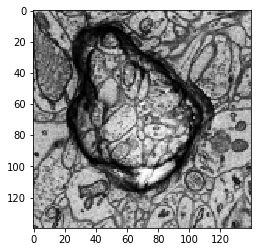

In [39]:
plt.imshow(dataset[0]['input'].squeeze(),cmap='gray')